In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def drawFromADist(p):
    if(np.sum(p)==0):
        p = 0.05*(np.ones(1,len(p)))
    p = p/np.sum(p)
    id = np.where((np.random.rand() - np.cumsum(p))<0)
    sample = np.min(id)
    out = np.zeros(np.size(p))
    out[sample] = 1
    return out

#to generate a random schedule 
def schedule(N_ITEMS,ENCODING_TIME):
    a = []
    for i in range(N_ITEMS):
        x = int(np.round(np.random.uniform()*ENCODING_TIME))
        a.append(x)
    a.sort()
    b = [[a[i],i] for i in range(N_ITEMS)]
    print(b)
    return np.array(b)

#to calculate schedule load
def load(sch,ENCODING_TIME=500):
    return ENCODING_TIME/np.median(np.diff(sch[:,0]))



# Q1

In [3]:
N_WORLD_FEATURES = 5
N_ITEMS = 10
ENCODING_TIME = 500
TEST_TIME = 20

#one of the schedule gives retrieval greater than 7
sch = np.array([[ 50, 0],[ 99, 1],[224, 2],[226, 3],[273, 4],[286, 5],[338, 6],[377, 7],[437, 8],[486, 9]])

def expq1(sch,ENCODING_TIME=500,N_ITEMS=10,N_WORLD_FEATURES=5,TEST_TIME=20):
    #initializing the world
    world_m = np.array([1,2,1,2,3])
    world_var = 1
    delta = 0.05                     
    beta_param = 0.05         
    m = 0
    
    encoding = np.zeros((N_ITEMS,N_WORLD_FEATURES+1))
    world = np.ones(5)
   
    for time in range(ENCODING_TIME):   
        world_m = world_m + delta
        #sampling the context from the world mean 
        temp = np.random.normal(world_m,world_var)
        #context drift 
        world = beta_param*world + temp
        #encoding the at the given time
        if(m<(N_ITEMS)):
            if(time==sch[m][0]):
                encoding[m,:]= np.append(world,m)
                m =  m + 1
    out = []
    while(time<ENCODING_TIME+TEST_TIME):
        world_m = world_m + delta
        temp = np.random.normal(world_m,world_var)
        world = beta_param*world + temp
        soa = np.zeros(N_ITEMS)
        #calculating the activation of context with all encoding items
        for m in range(0,N_ITEMS):
            soa[m] = np.sum(np.dot(encoding[m,:5],world)) 
        out.append(np.where(drawFromADist(soa)>0)[0])
        time = time + 1      

    success = len(np.unique(out)) 
    return success


#taking mean of 200 to reduce the randomness of retrieval
a = []
for i in range(200):
    a.append(expq1(sch))
print('Average retrieval ',np.mean(a))
print('Scheduling load', load(sch))

Average retrieval  8.395
Scheduling load 10.204081632653061


# Q2

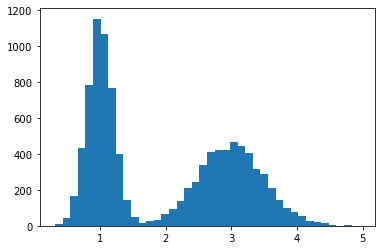

In [4]:
#gaussian mixture distribution 
''' delta is sampled with equal probability from each distribtuion with means 1,3 and var 0.2,0.5'''
def delta():
    mu = [1,3]
    var = [0.2,0.5]
    a = random.sample([0,1],1)[0]
    delta = np.random.normal(mu[a],var[a])
    return delta

a = [] 
#plotting the distribution
for i in range(10000):
    a.append(delta())
plt.hist(a,bins=40)
print()

In [5]:
def experiment1(schedule):
    #initializing the world
    world_m = np.array([1,2,1,2,5])
    world_var = 1
    #delta = 0.05                     
    beta_param = 0.001               
    m = 0
    world = np.ones(5)

    encoding = np.zeros((N_ITEMS,N_WORLD_FEATURES+1))
    for time in range(ENCODING_TIME):   
        world_m = world_m + delta()
        temp = np.random.normal(world_m,world_var)
        #using beta parameter for the context drift
        world = beta_param*world + temp
        #encoding the at the given time
        if(m<(N_ITEMS)):
            if(time==sch[m][0]):
                encoding[m,:]= np.append(world,m)
                m =  m + 1
    out = []
    while(time<ENCODING_TIME+TEST_TIME):
        world_m = world_m + delta()
        temp = np.random.normal(world_m,world_var)
        #using beta parameter for the context drift
        world = beta_param*world + temp
        soa = np.zeros(N_ITEMS)
        #calculating the activition of all encoding items
        for m in range(0,N_ITEMS):
            soa[m] = np.dot(encoding[m,:5],world)
        out.append(np.where(drawFromADist(soa)>0)[0])
        time = time + 1      

    success = len(np.unique(out)) 
    return success

In [6]:
sch = schedule(10,500)

def run(sch):
    print('Schedule is - \n',sch)
    print('Schedule load is - ',load(sch))
    a = []
    for i in range(100):
        a.append(experiment1(sch))
    print('Mean retrieval is - ', np.mean(a))
    return np.mean(a)

def createsch(lis):
    temp = []
    for i in range(len(lis)):
        temp.append([lis[i],i])
    return np.array(temp)

[[7, 0], [21, 1], [108, 2], [207, 3], [239, 4], [339, 5], [351, 6], [370, 7], [400, 8], [468, 9]]


Trying out different schedule to get the optimal schedule load

In [7]:
#retreival is greater than 8 but scedule load is 500
a = [490 + i for i in range(10)]
sch = createsch(a)
run(sch)

Schedule is - 
 [[490   0]
 [491   1]
 [492   2]
 [493   3]
 [494   4]
 [495   5]
 [496   6]
 [497   7]
 [498   8]
 [499   9]]
Schedule load is -  500.0
Mean retrieval is -  8.97


8.97

In [8]:
#scedule with the equal gap
a = [50*i-1 for i in range(1,11)]
sch = createsch(a)
print(load(sch))
run(sch)

10.0
Schedule is - 
 [[ 49   0]
 [ 99   1]
 [149   2]
 [199   3]
 [249   4]
 [299   5]
 [349   6]
 [399   7]
 [449   8]
 [499   9]]
Schedule load is -  10.0
Mean retrieval is -  8.07


8.07

In [9]:
#The schedule load is less but the retrieval is also less than 7 
a = [0,1,2,4,103,202,301,400,499]
sch = createsch(a)
print(load(sch))
run(sch)

5.05050505050505
Schedule is - 
 [[  0   0]
 [  1   1]
 [  2   2]
 [  4   3]
 [103   4]
 [202   5]
 [301   6]
 [400   7]
 [499   8]]
Schedule load is -  5.05050505050505
Mean retrieval is -  5.04


5.04

In [10]:
#The schedule load is less and also the average retreival is also greater than 7
a = [0,99,198,297,396,495,496,497,498,499]
sch = createsch(a)
print(load(sch))
run(sch)

5.05050505050505
Schedule is - 
 [[  0   0]
 [ 99   1]
 [198   2]
 [297   3]
 [396   4]
 [495   5]
 [496   6]
 [497   7]
 [498   8]
 [499   9]]
Schedule load is -  5.05050505050505
Mean retrieval is -  7.74


7.74

The idea of getting minimum schedule load is that the median difference should be maximum. To get the median difference maximum we should have half minimum distance and remaining distance should be maximum. Here the maximum median distance will be 99.

The optimal schedule pattern is [0,99,198,297,396,495,496,497,498,499]

# Q3

In this part since agent does not know the distribution, to approximate this distribution parameters, EM algorithm is used.

In [16]:
from sklearn.mixture import GaussianMixture as GMM

def exp2(sch):
    #initializing the world    
    world_m = np.array([1,2,1,2,3])
    world_var = 1
    #delta = 0.05                     
    beta_param = 0.001               
    m = 0
    
    world = np.zeros(5)
    delta_samples = []
    encoding = np.zeros((N_ITEMS,N_WORLD_FEATURES+1))
    
    for time in range(ENCODING_TIME):  
        temp_delta = delta()
        world_m = world_m  + temp_delta 
        delta_samples.append(temp_delta)
        temp = np.random.normal(world_m,world_var)
        #beta parameter for the context drift
        world = beta_param*world + temp
        #encoding the at the given time
        if(m<(N_ITEMS)):
            if(time==sch[m][0]):
                encoding[m,:]= np.append(world,m)
                m =  m + 1

    #EM to find the parameter of the distribution
    x = GMM(2, covariance_type='diag').fit(np.array(delta_samples).reshape(-1,1))
    #print(x.means_)
    #print(np.sqrt(x.covariances_))
    m1 = x.means_[0][0]
    m2 = x.means_[1][0]
    v1 = round(np.sqrt(x.covariances_[0][0]),4)
    v2 = round(np.sqrt(x.covariances_[1][0]),4)
    #print('Means - ',m1,m2,'Variance - ',v1,v2)


    #delta funtion to get means from the em
    def delta_samp(x,y,v1,v2):
        mu = [m1,m2]
        var = [v1,v2]
        a = random.sample([0,1],1)[0]
        delta = np.random.normal(mu[a],var[a])
        return delta


    out = []

    x = world = np.ones(5)
    while(time<ENCODING_TIME+TEST_TIME):
        world_m = world_m + delta_samp(m1,m2,v1,v2)
        temp = np.random.normal(world_m,world_var)
        world = beta_param*world + temp
        soa = np.zeros(N_ITEMS)
        #calculating the activition of all encoding items
        for m in range(0,N_ITEMS):
            soa[m] = np.dot(encoding[m,:5],world)
        out.append(np.where(drawFromADist(soa)>0)[0])
        time = time + 1      
    success = len(np.unique(out)) 
    return success

In [17]:
#one of the fixed schedule for which the retrieval is greater than 7
sch = np.array([[ 50, 0],[ 99, 1],[220, 2],[226, 3],[273, 4],[286, 5],[338, 6],[377, 7],[437, 8],[486, 9]])
def run2(sch):
    temp = []
    for i in range(100):
        temp.append(exp2(sch))
    print('Average retrieval - ',np.mean(temp))
    print('Schedule load - ',load(sch))
run2(sch)

Average retrieval -  8.28
Schedule load -  10.204081632653061


The optimal scheduling pattern for this part also remains the same

In [18]:
a = [490 + i for i in range(10)]
sch = createsch(a)
run2(sch)

Average retrieval -  8.9
Schedule load -  500.0


In [19]:
#schedule load is less but retrieval is also less than 7
a = [0,1,2,4,103,202,301,400,499]
sch = createsch(a)
run2(sch)

Average retrieval -  4.85
Schedule load -  5.05050505050505


In [20]:
a = [0,99,198,297,396,495,496,497,498,499]
sch = createsch(a)
run2(sch)

Average retrieval -  7.74
Schedule load -  5.05050505050505
